Load all packages you need.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

Read the dataset that you prepared yesterday afternoon (without outlier and missing data). 

In [2]:
df = pd.read_csv("../data/df_imputed_clean.csv")

Let's try SOM on Age and Pregnancies. Don't forget the the variables should be normalized!

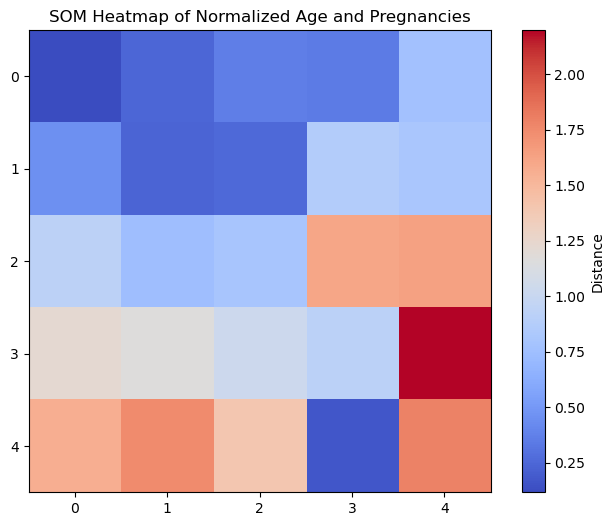

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Step 1: Normalize the data (if not already normalized)
X = df[['Age', 'Pregnancies']].values
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Step 2: Initialize SOM parameters
grid_size = (5, 5)  # 5x5 grid of neurons
input_len = X_normalized.shape[1]  # Number of features (2: Age and Pregnancies)
iterations = 100  # Number of iterations
sigma = 1.0  # Spread of the neighborhood
learning_rate = 0.5  # Learning rate

# Step 3: Initialize the weight grid
weights = np.random.rand(grid_size[0], grid_size[1], input_len)

# Function to compute the Euclidean distance
def euclidean_distance(x, y):
    return np.sqrt(np.sum((x - y)**2))

# Function to update the weights of the winning neuron and its neighbors
def update_weights(winner, sample, weights, learning_rate, sigma, iteration, max_iterations):
    for i in range(weights.shape[0]):
        for j in range(weights.shape[1]):
            # Compute the distance between the current neuron and the winner
            dist = euclidean_distance(np.array([i, j]), winner)
            # Compute the neighborhood function
            theta = np.exp(-dist**2 / (2 * (sigma**2)))
            # Update the weights
            weights[i, j] += learning_rate * theta * (sample - weights[i, j])
    return weights

# Step 4: Training the SOM
for iteration in range(iterations):
    # Randomly pick a sample from the dataset
    sample_idx = np.random.randint(len(X_normalized))
    sample = X_normalized[sample_idx]
    
    # Find the best matching unit (BMU)
    bmu_idx = np.unravel_index(np.argmin([euclidean_distance(sample, w.flatten()) for w in weights.reshape(-1, input_len)]), grid_size)
    
    # Update the weights
    weights = update_weights(bmu_idx, sample, weights, learning_rate, sigma, iteration, iterations)
    
    # Reduce sigma and learning rate over time
    sigma -= sigma / iterations
    learning_rate -= learning_rate / iterations

# Step 5: Visualize the SOM results
plt.figure(figsize=(8, 6))

# Plot distance map as a heatmap (showing how similar neurons are)
distance_map = np.zeros(grid_size)
for i in range(grid_size[0]):
    for j in range(grid_size[1]):
        distance_map[i, j] = euclidean_distance(weights[i, j], np.mean(weights, axis=(0, 1)))

plt.imshow(distance_map, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Distance')
plt.title('SOM Heatmap of Normalized Age and Pregnancies')
plt.show()


Perform the SOM algorithm (with minisom a well documented package is available on conda-forge). Tian, Azarian & Pecht (2014) suggest that a good estimation for the number of nodes in your map should be nodes = 5*sqrt(datapoints). Lets start with a 11x11 map structure and and define rectangular neighbourhood (only vertical and horizontal, no diagonal neighbours). Use a random seed for for reproducibility.  <br>
Step 1:Initialize your SOM. <br>
Stel 2: Train your SOM on 1000 iterations. <br>


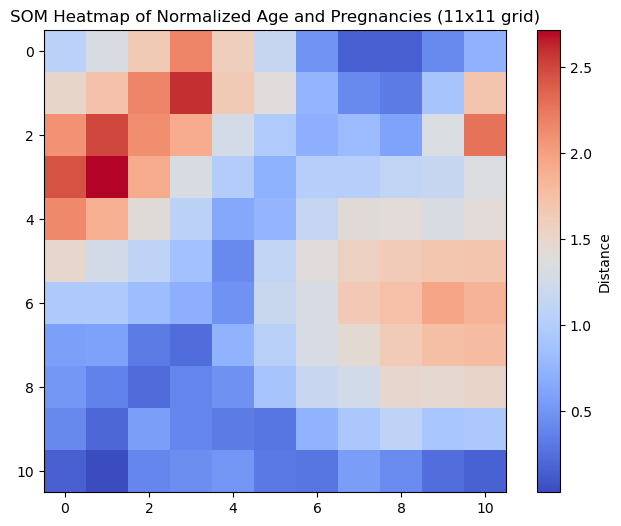

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Step 1: Prepare the normalized data
X = df[['Age', 'Pregnancies']].values
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Step 2: Initialize the SOM
som_size = 11  # 11x11 grid structure
input_len = X_normalized.shape[1]  # Number of features (2: Age and Pregnancies)

# Randomly initialize the weight matrix with values between 0 and 1
weights = np.random.rand(som_size, som_size, input_len)

# Parameters
iterations = 1000  # Number of iterations
sigma = 1.0  # Spread of the neighborhood
learning_rate = 0.5  # Learning rate

# Function to compute Euclidean distance
def euclidean_distance(x, y):
    return np.sqrt(np.sum((x - y)**2))

# Function to find the best matching unit (BMU)
def find_bmu(sample, weights):
    min_dist = float('inf')
    bmu_idx = (0, 0)
    for i in range(som_size):
        for j in range(som_size):
            dist = euclidean_distance(sample, weights[i, j])
            if dist < min_dist:
                min_dist = dist
                bmu_idx = (i, j)
    return bmu_idx

# Function to update the weights of the BMU and its neighbors
def update_weights(bmu_idx, sample, weights, learning_rate, sigma, iteration, max_iterations):
    for i in range(som_size):
        for j in range(som_size):
            # Calculate the distance from the BMU
            dist = euclidean_distance(np.array([i, j]), bmu_idx)
            # Calculate the neighborhood function (using Gaussian function)
            theta = np.exp(-dist**2 / (2 * (sigma**2)))
            # Update the weights
            weights[i, j] += learning_rate * theta * (sample - weights[i, j])
    return weights

# Step 3: Training the SOM
for iteration in range(iterations):
    # Randomly pick a sample from the dataset
    sample_idx = np.random.randint(len(X_normalized))
    sample = X_normalized[sample_idx]
    
    # Find the BMU for the sample
    bmu_idx = find_bmu(sample, weights)
    
    # Update the weights of the BMU and its neighbors
    weights = update_weights(bmu_idx, sample, weights, learning_rate, sigma, iteration, iterations)
    
    # Gradually reduce sigma and learning rate over time
    sigma -= sigma / iterations
    learning_rate -= learning_rate / iterations

# Step 4: Visualizing the SOM result
plt.figure(figsize=(8, 6))

# Plot distance map as a heatmap (showing how similar neurons are)
distance_map = np.zeros((som_size, som_size))
for i in range(som_size):
    for j in range(som_size):
        distance_map[i, j] = euclidean_distance(weights[i, j], np.mean(weights, axis=(0, 1)))

plt.imshow(distance_map, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Distance')
plt.title('SOM Heatmap of Normalized Age and Pregnancies (11x11 grid)')
plt.show()


Step 3: Plot the neighbourdhood distance of your trained SOM. How many cluster do you detect?

In [ ]:
5

Step 4: Run K-Means on the nodes of your SOM. <br>
Step 5: Assign each data point to it's BMU's cluster label.<br>
Step 6: Plot clusters on scatterplot of "Age" vs "Pregnancies". Compare the clusters with the clusters determined by the K-Means algorithm during the previous coding break. 

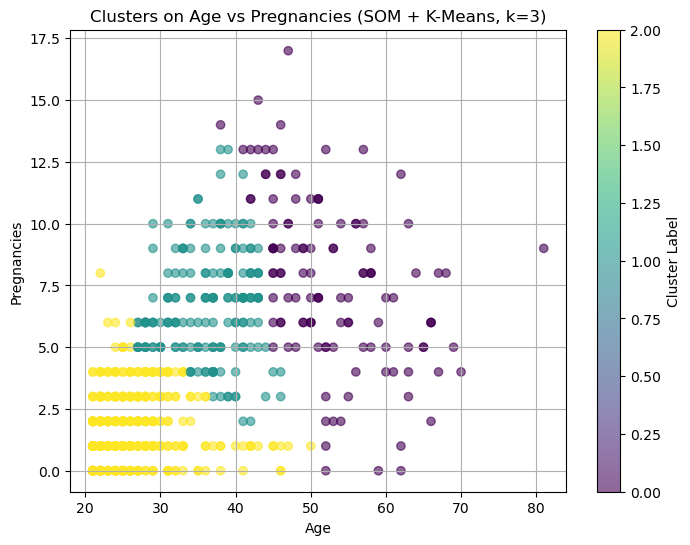

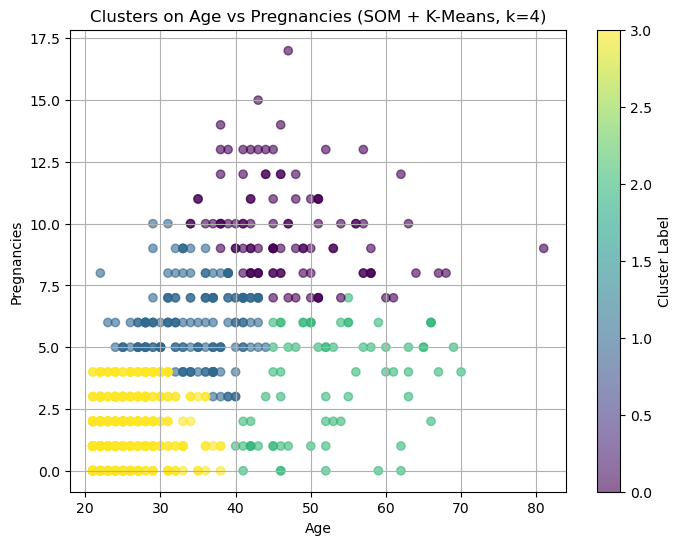

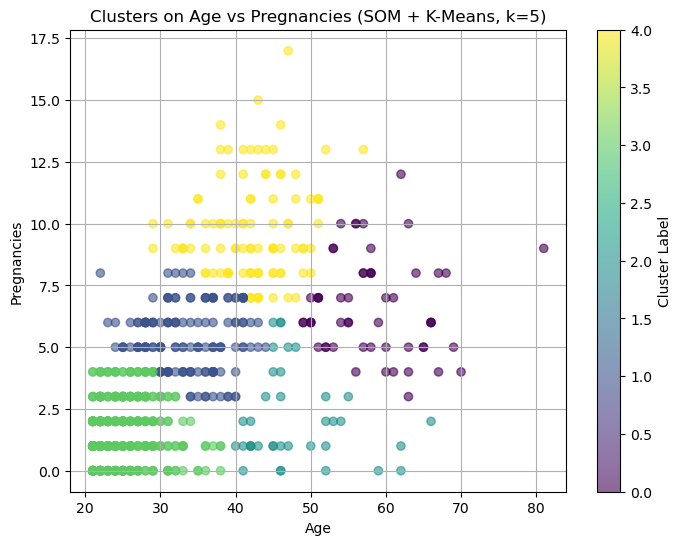

In [7]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Function to perform K-Means on SOM nodes and plot the clusters
def run_kmeans_and_plot(k, weights, X_normalized, som_size):
    # Flatten the SOM grid into a 2D array of neurons' weights
    weights_flat = weights.reshape(-1, X_normalized.shape[1])

    # Apply K-Means with k clusters on the nodes of the SOM
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(weights_flat)

    # Get the cluster labels for each node (neuron) in the SOM
    som_clusters = kmeans.labels_.reshape(som_size, som_size)

    # Assign each data point to its BMU's cluster label
    data_clusters = []
    for sample in X_normalized:
        bmu_idx = find_bmu(sample, weights)  # Find the BMU for the data point
        cluster_label = som_clusters[bmu_idx]  # Get the cluster label of the BMU
        data_clusters.append(cluster_label)

    # Add the cluster labels to the DataFrame
    df[f'SOM_Cluster_k={k}'] = data_clusters

    # Plot the clusters on scatterplot of "Age" vs "Pregnancies"
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(df['Age'], df['Pregnancies'], c=df[f'SOM_Cluster_k={k}'], cmap='viridis', alpha=0.6)
    plt.xlabel('Age')
    plt.ylabel('Pregnancies')
    plt.title(f'Clusters on Age vs Pregnancies (SOM + K-Means, k={k})')
    plt.colorbar(scatter, label='Cluster Label')
    plt.grid(True)
    plt.show()

# Run K-Means for k = 3, k = 4, and k = 5
for k in [3, 4, 5]:
    run_kmeans_and_plot(k, weights, X_normalized, som_size)
